------------- state = work -------------
データ数 : 7007
---------- 確率の上昇値の統計量 ----------
dff max = 49.22760128974914
dff min = 1.1920928955078125e-05
dff average = 1.9947083413472186
dff 90 percentile = 5.781716108322144
---------- 確率の上昇値の分布 ----------


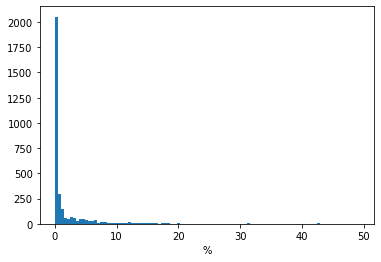

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 6283
eating --> 647
reading --> 77
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


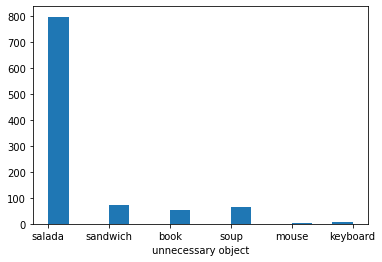

---------- 各物体の登場回数（ヒストグラム） ----------


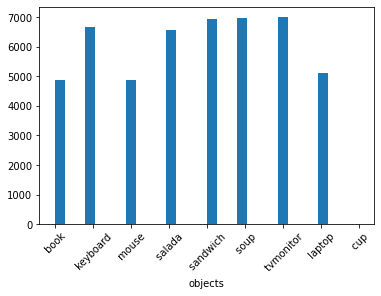

------------- state = eating -------------
データ数 : 6951
---------- 確率の上昇値の統計量 ----------
dff max = 46.29562497138977
dff min = 1.1920928955078125e-05
dff average = 1.2658878537671243
dff 90 percentile = 1.5166962146759042
---------- 確率の上昇値の分布 ----------


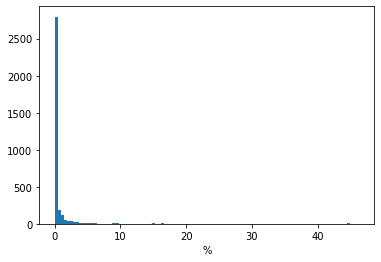

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 372
eating --> 6543
reading --> 36
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


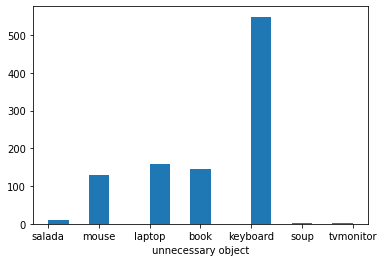

---------- 各物体の登場回数（ヒストグラム） ----------


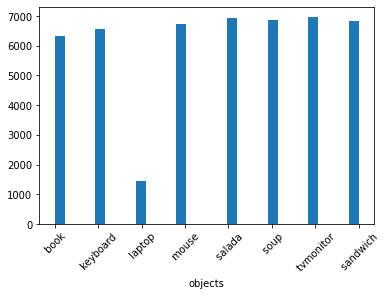

------------- state = reading -------------
データ数 : 6867
---------- 確率の上昇値の統計量 ----------
dff max = 48.81662130355835
dff min = 5.9604644775390625e-05
dff average = 5.221580003160987
dff 90 percentile = 14.924103021621704
---------- 確率の上昇値の分布 ----------


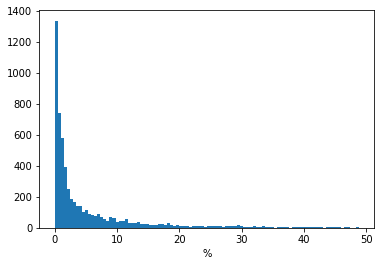

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 469
eating --> 514
reading --> 5884
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


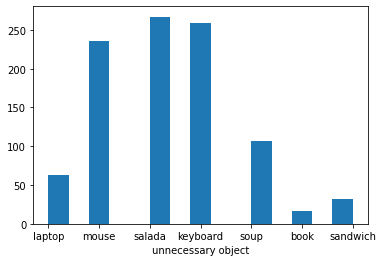

---------- 各物体の登場回数（ヒストグラム） ----------


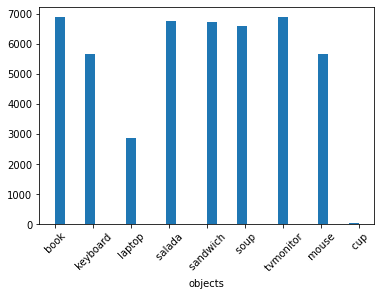

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

user_name = 'nao'

path0 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/row_pattern_0_analyzed.csv'
path1 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/row_pattern_1_analyzed.csv'
path2 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/row_pattern_2_analyzed.csv'
path_dict = {'work':path0,'eating':path1,'reading':path2}

for state, path in path_dict.items():
    print(f'------------- state = {state} -------------')
    df = pd.read_csv(path, header=0)
    print(f'データ数 : {len(df)}')
    diff =  np.array(df['diff'].dropna())

    print('---------- 確率の上昇値の統計量 ----------')
    diff_average = diff.mean()
    print(f'dff max = {diff.max()}')
    print(f'dff min = {diff.min()}')
    print(f'dff average = {diff.mean()}')
    print(f'dff 90 percentile = {np.percentile(diff, 90)}')
    
    print('---------- 確率の上昇値の分布 ----------')
    plt.hist(diff, bins=100)
    plt.xlabel('%')
    plt.show()
    
    print('---------- ノードを取り除いた時にどの状態として認識されるかするか ----------')
    print(f"working --> {len(df[df['dummy_state']=='working'])}")
    print(f"eating --> {len(df[df['dummy_state']=='eating'])}")
    print(f"reading --> {len(df[df['dummy_state']=='reading'])}")
    
    print('---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------')
    is_unnecessary_df = df[df['is_unnecessary']==True]
    plt.hist(list(is_unnecessary_df['removed_obj']), bins=15)
    plt.xlabel('unnecessary object')
    plt.show()
    
    print('---------- 各物体の登場回数（ヒストグラム） ----------')
    obj_4_real = ["face", "tvmonitor", "laptop", "mouse", "keyboard", "book", "banana", "apple", "orange", "pizza","cup"]
    obj_4_marker = ['toast', 'sandwitch', 'cereal', 'scrambled egg', 'soup', 'salada', 'donut']
    obj_list = obj_4_real+obj_4_marker
    all_obj = []
    for objects in df['objects']:
        objects = objects.replace('[','').replace(']','').replace("'",'').replace("face,",'').split(",")
        objects.sort()
        all_obj += objects
    plt.hist(all_obj, bins=30)
    plt.xticks(rotation=45)
    plt.xlabel('objects')
    plt.show()
            